In [83]:
import gym
import random
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch import optim
import copy

import torch.nn.functional as F


In [84]:
env = gym.make('MountainCar-v0')
action_space=[0,1,2]
num_states = env.observation_space.shape[0]

In [85]:
seed = 100
env.seed(seed)
torch.manual_seed(seed)

In [86]:
# Hyper - Parameters

NUMBER_OF_EPISODES = 1000
hyper_parameters = {}
hyper_parameters['learning_rate'] = 0.001
hyper_parameters['max_timesteps'] = 1000
hyper_parameters['epsilon'] = 1.0
hyper_parameters['epsilon_decay'] = 0.99
hyper_parameters['epsilon_min'] = 0.01
hyper_parameters['discount_factor'] = 0.99
hyper_parameters['replay_length'] = 200
hyper_parameters['batch_size'] = 64
hyper_parameters['target_update'] = 1

In [87]:

class Net(nn.Module):
    def __init__(self , input_dim, output_dim):
        super().__init__()
        #self.fc1 = nn.Linear(input_dim,64)
        #self.fc2 = nn.Linear(64,output_dim)
        self.fc1 = nn.Linear(input_dim,128)
        self.fc2 = nn.Linear(128,output_dim)

    def forward(self, x):
        output = F.relu(self.fc1(x))
        output = self.fc2(output)
        return output

In [88]:

class DQN(object):
    def __init__(self):
        self.policy_network = Net(num_states,len(action_space))
        self.target_network = Net(num_states,len(action_space))
        self.target_network.load_state_dict(self.policy_network.state_dict())
        
        self.D = []
        self.D_length = hyper_parameters['replay_length']
        self.optimizer = optim.Adam(params=self.policy_network.parameters() , lr=hyper_parameters['learning_rate'])
        self.loss_func = torch.nn.MSELoss()
    def get_action(self,state):
      
        with torch.no_grad():
            state = torch.Tensor(state)
            q_values = self.policy_network(state)
            action = torch.max(q_values,0)[1]
    
        return action.item()
  
    def update_nn(self, minibatch):#state, action, next_state, reward, done):
        for state, action, next_state, reward, done in minibatch:
          state = torch.Tensor(state)
          next_state = torch.Tensor(next_state)
      
          reward = torch.Tensor([reward])
          if done:
              target_value = reward
          else:
              next_state_values = self.policy_network(next_state).detach()
              target = torch.max(next_state_values)
              target_value = reward + hyper_parameters['discount_factor'] * target

          predicted_value = self.policy_network(state)[action].view(-1)

          loss = self.loss_func(predicted_value, target_value)

          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()
    
    def train(self):
      steps_total = []
      for episode in range(number_of_episodes):
        state = env.reset()
        step = 0

        if episode % hyper_parameters["target_update"] == 0:
          self.target_network.load_state_dict(self.policy_network.state_dict())
          self.target_network.eval()
        
        batch = []
        done = False
        while not done:
            step += 1
          
          

            if random.random() > hyper_parameters['epsilon']:
              action = self.get_action(state)
            else:
              action = env.action_space.sample()
              
            next_state, reward, done, info = env.step(action)
            modified_reward = reward + 10 * abs (next_state [1])

            
            # batch.append([state, action, next_state, reward, done])
            if len(self.D) >= self.D_length:
              self.D.pop(0)
            
            self.D.append([state, action, next_state, modified_reward, done])

            
            if step%3==0:
              if len(self.D) > hyper_parameters['batch_size']:
                minibatch = random.sample(self.D, hyper_parameters['batch_size'])
                self.update_nn(minibatch)
                if hyper_parameters['epsilon'] > hyper_parameters['epsilon_min']:
                  hyper_parameters['epsilon'] *= hyper_parameters['epsilon_decay']
            # batch = []
            state = next_state

            if done:
                metrics['total_rewards'].append(step)
                metrics['epsilon_decay'].append(hyper_parameters['epsilon'])
                print("Episode : {} \t Reward : {} \t Epsilon : {}".format(episode, step, hyper_parameters['epsilon']))
                break
            
        count = 0
        for score in metrics['total_rewards'][-20:]:
          if score > 475:
            count += 1
                  
        if count > 10:
          break

    def execute(self,num_episodes):
        # env = gym.make('CartPole-v1')
        env = wrappers.Monitor(env, "./gym-results", force=True)
        metrics['rewards_evaluation'] = []

        for episodes in range(num_episodes):
            step_count = 0
            state = env.reset()
            done = False
            while not done:
                action = self.get_action(state)
                state, reward, done, _ = env.step(action)
                if done:
                    reward = 0
                print(action,step_count)
#                 env.render()
                step_count += 1
#             print(step_count)
#             print("---------------end-----------------")
            metrics['rewards_evaluation'].append(step_count)
#         print("Average reward : {}".format(sum(metrics['rewards_evaluation'])/len(metrics['rewards_evaluation'])))

Episode : 0 	 Reward : 200 	 Epsilon : 0.6361854860638709
Episode : 1 	 Reward : 200 	 Epsilon : 0.3277227574378037
Episode : 2 	 Reward : 200 	 Epsilon : 0.16882215658069055
Episode : 3 	 Reward : 200 	 Epsilon : 0.08696655909824694
Episode : 4 	 Reward : 200 	 Epsilon : 0.04479970256613776
Episode : 5 	 Reward : 200 	 Epsilon : 0.02307798964136395
Episode : 6 	 Reward : 200 	 Epsilon : 0.011888329059788623
Episode : 7 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 8 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 9 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 10 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 11 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 12 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 13 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 14 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 15 	 Reward : 200 	 Epsilon : 0.009920974201040588
Episode : 16 	 Reward : 200 	 Epsilon : 0.

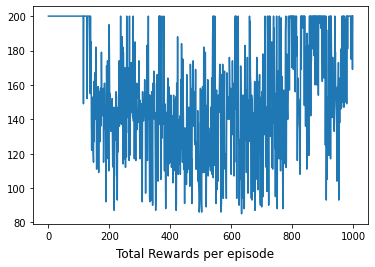

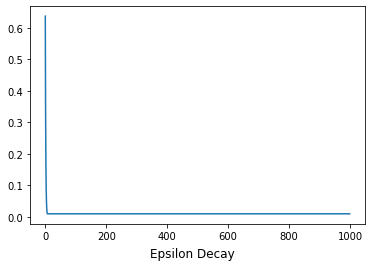

In [89]:

# DQN
%matplotlib inline
# env = gym.make('CartPole-v1')


number_of_episodes = 1000
metrics = {}
metrics['timesteps'], metrics['penalties'], metrics['rewards'], metrics['total_rewards'], metrics['epsilon_decay'] = [], [], [], [], []

CP = DQN()
CP.train()



plt.plot(metrics['total_rewards'])
plt.figtext(0.5, 0.01, "Total Rewards per episode", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
plt.savefig('total_rewards.png')
# plt.plot(metrics['penalties'])
# plt.show()
# plt.plot(metrics['timesteps'])
# plt.show()
plt.plot(metrics['epsilon_decay'])
plt.figtext(0.5, 0.01, "Epsilon Decay", wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('eps_decay.png')

plt.show()
# k_det.execute("deterministic")
metrics_q_det = copy.deepcopy(metrics)

---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end-----------------
---------------end----------

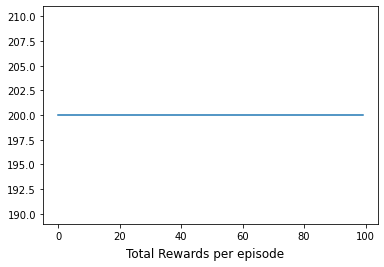

In [94]:
env = gym.make('MountainCar-v0')
metrics['rewards_evaluation'] = []
num_episodes  =100
for episodes in range(num_episodes):
    step_count = 0
    state = env.reset()
    done = False
    while not done:
        action = CP.get_action(state)
        state, reward, done, _ = env.step(action)
        if done:
            reward = 0
        # print(action,step_count)
#                 env.render()
        step_count += 1
    # print(step_count)
    # print("---------------end-----------------")
    metrics['rewards_evaluation'].append(step_count)
print("Average reward : {}".format(sum(metrics['rewards_evaluation'])/len(metrics['rewards_evaluation'])))
plt.plot(metrics['rewards_evaluation'])
plt.figtext(0.5, 0.01, "Total Rewards per episode", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()

In [ ]:

class DDQN(object):
    def __init__(self):
        self.policy_network = Net(num_states,len(action_space))
        self.target_network = Net(num_states,len(action_space))
        self.target_network.load_state_dict(self.policy_network.state_dict())
        
        self.D = []
        self.D_length = hyper_parameters['replay_length']
        self.optimizer = optim.Adam(params=self.policy_network.parameters() , lr=hyper_parameters['learning_rate'])
        self.loss_func = torch.nn.MSELoss()
    def get_action(self,state):
      
        with torch.no_grad():
            state = torch.Tensor(state)
            q_values = self.policy_network(state)
            action = torch.max(q_values,0)[1]
    
        return action.item()
  
    def update_nn(self, minibatch):#state, action, next_state, reward, done):
        for state, action, next_state, reward, done in minibatch:
          state = torch.Tensor(state)
          next_state = torch.Tensor(next_state)
      
          reward = torch.Tensor([reward])
          if done:
              target_value = reward
          else:
              target = self.target_network(state)[action].view(-1)
              target_value = reward + hyper_parameters['discount_factor'] * target

          predicted_value = self.policy_network(state)[action].view(-1)

          loss = self.loss_func(predicted_value, target_value)

          self.optimizer.zero_grad()
          loss.backward()
          self.optimizer.step()
    
    def train(self):
      steps_total = []
      for episode in range(number_of_episodes):
        state = env.reset()
        step = 0

        if episode % hyper_parameters["target_update"] == 0:
          TAU = 0.9
          target_params = self.target_network.named_parameters()
          upd_params = dict(target_params)
          for model_name, model_param in self.policy_network.named_parameters():
              if model_name in target_params:
                  # Update parameter
                  upd_params[model_name].data.copy_((TAU)*model_param.data + (1-TAU)*target_params[model_param].data)
          
          self.target_network.load_state_dict(upd_params)
          self.target_network.eval()
        
        batch = []
        done = False
        while not done:
            step += 1
          
          

            if random.random() > hyper_parameters['epsilon']:
              action = self.get_action(state)
            else:
              action = env.action_space.sample()
              
            next_state, reward, done, info = env.step(action)

            
            # batch.append([state, action, next_state, reward, done])
            if len(self.D) >= self.D_length:
              self.D.pop(0)
            
            self.D.append([state, action, next_state, reward, done])

            
            if step%3==0:
              if len(self.D) > hyper_parameters['batch_size']:
                minibatch = random.sample(self.D, hyper_parameters['batch_size'])
                self.update_nn(minibatch)
                if hyper_parameters['epsilon'] > hyper_parameters['epsilon_min']:
                  hyper_parameters['epsilon'] *= hyper_parameters['epsilon_decay']
            # batch = []
            state = next_state

            if done:
                metrics['total_rewards'].append(step)
                metrics['epsilon_decay'].append(hyper_parameters['epsilon'])
                print("Episode : {} \t Reward : {} \t Epsilon : {}", episode, step, hyper_parameters['epsilon'])
                break
            
        count = 0
        for score in metrics['total_rewards'][-20:]:
          if score > 475:
            count += 1
                  
        if count > 10:
          break

    def execute(self,num_episodes):
        # env = gym.make('CartPole-v1')
        env = wrappers.Monitor(env, "./gym-results", force=True)
        metrics['rewards_evaluation'] = []

        for episodes in range(num_episodes):
            step_count = 0
            state = env.reset()
            done = False
            while not done:
                action = self.get_action(state)
                state, reward, done, _ = env.step(action)
                if done:
                    reward = 0
                print(action,step_count)
#                 env.render()
                step_count += 1
#             print(step_count)
#             print("---------------end-----------------")
            metrics['rewards_evaluation'].append(step_count)
#         print("Average reward : {}".format(sum(metrics['rewards_evaluation'])/len(metrics['rewards_evaluation'])))

In [ ]:
# Hyper - Parameters

NUMBER_OF_EPISODES = 500
hyper_parameters = {}
hyper_parameters['learning_rate'] = 0.01
hyper_parameters['max_timesteps'] = 500
hyper_parameters['epsilon'] = 0.9
hyper_parameters['epsilon_decay'] = 0.999
hyper_parameters['epsilon_min'] = 0.02
hyper_parameters['discount_factor'] = 0.995
hyper_parameters['replay_length'] = 64
hyper_parameters['batch_size'] = 32
hyper_parameters['target_update'] = 1
# DQN
%matplotlib inline
# env = gym.make('CartPole-v1')


number_of_episodes = 500
metrics = {}
metrics['timesteps'], metrics['penalties'], metrics['rewards'], metrics['total_rewards'], metrics['epsilon_decay'] = [], [], [], [], []

CP_Double = DDQN()
CP_Double.train()



plt.plot(metrics['total_rewards'])
plt.figtext(0.5, 0.01, "Total Rewards per episode", wrap=True, horizontalalignment='center', fontsize=12)
plt.show()
plt.savefig('total_rewards.png')
# plt.plot(metrics['penalties'])
# plt.show()
# plt.plot(metrics['timesteps'])
# plt.show()
plt.plot(metrics['epsilon_decay'])
plt.figtext(0.5, 0.01, "Epsilon Decay", wrap=True, horizontalalignment='center', fontsize=12)
plt.savefig('eps_decay.png')

plt.show()
# k_det.execute("deterministic")
metrics_DDQN = copy.deepcopy(metrics)

Episode : {} 	 Reward : {} 	 Epsilon : {} 0 23 0.9
Episode : {} 	 Reward : {} 	 Epsilon : {} 1 19 0.8973026990999999
Episode : {} 	 Reward : {} 	 Epsilon : {} 2 46 0.8839369683463054
Episode : {} 	 Reward : {} 	 Epsilon : {} 3 36 0.8733878705367771
Episode : {} 	 Reward : {} 	 Epsilon : {} 4 24 0.8664251735842253
Episode : {} 	 Reward : {} 	 Epsilon : {} 5 22 0.8603783620032066
Episode : {} 	 Reward : {} 	 Epsilon : {} 6 35 0.8509613791521793
Episode : {} 	 Reward : {} 	 Epsilon : {} 7 9 0.8484110470478988
Episode : {} 	 Reward : {} 	 Epsilon : {} 8 28 0.8408058192624265
Episode : {} 	 Reward : {} 	 Epsilon : {} 9 27 0.8332687653767049
Episode : {} 	 Reward : {} 	 Epsilon : {} 10 29 0.8257992742741788
Episode : {} 	 Reward : {} 	 Epsilon : {} 11 21 0.8200359922649304
Episode : {} 	 Reward : {} 	 Epsilon : {} 12 24 0.8134986194699355
Episode : {} 	 Reward : {} 	 Epsilon : {} 13 12 0.8102495027305916
Episode : {} 	 Reward : {} 	 Epsilon : {} 14 23 0.8045947431206439
Episode : {} 	 Reward